# COMS21202: Symbols, Patterns and Signals #
**CW1**: *This marked assignment has 3 parts to be undertaken in weeks 17-19 with students working in pairs.*

In [2]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from scipy.spatial import Voronoi, voronoi_plot_2d
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D


%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## Objectives ##
The goal of this assignment is for you to gain experience with clustering and classifying data. You will be given two sets of data points, each containing values for 5 different attributes (features) derived from an unspecified number of different object classes. One set contains 150 points and you should use it to *train* your classifier. The second set contains 15 points and you should use it to *test* your classifier. A complication is that the training set is **not** labelled - you will need to analyse the feature values, identify two features which are able to separate the different object classes and then cluster the points to obtain class labels which can then be used to train a classifier.

The steps that you should follow are detailed below. You will need to become familiar with several new `Python` commands and so we advise that you make use of the `Python` help facility. You will each be given different data files, with different attribute values, different class parameters and different distinguishing features. Your results will therefore not be the same as that of other students. For those working in pairs you will have to carry out the work for both data sets and be able to explain the differences obtained.

## CW1a (week 17) ##
### 1. ###
Collect your training and test data from SAFE (if you have difficulties in obtaining the dataset, try to use [this one](https://www.ole.bris.ac.uk/bbcswebdav/courses/COMS21202_2017/cw1data.train.txt) first and immediately alert TAs or Lecturers). You then need to identify which two features separate the classes in your training data. The best way of doing this is to visualise the data by plotting the attribute values for each pair of features. Use the `np.loadtxt` command to read in the data and the plotting commands (try `plotmatrix`) to plot attribute values against each other. Visually inspect the results to understand the data and argue which features best separate the classes. Once you identified the two features create a new data matrix `X` holding only those features as columns.

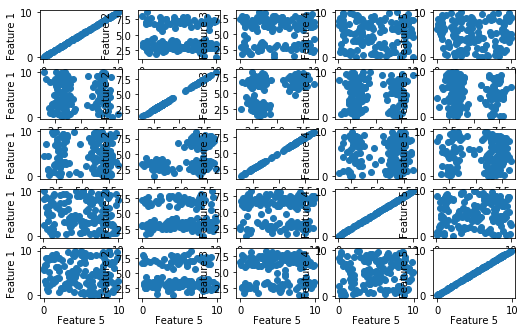

In [11]:
def plotmatrix(Matrix):
  r, c = Matrix.shape
  fig = plt.figure()
  plotID = 1
  for i in range(c):
    for j in range(c):
      ax = fig.add_subplot(c, c, plotID )
      plt.subplots_adjust(left=0, right=1.1, top=1, bottom=0)
      ax.scatter( Matrix[:,i], Matrix[:,j] )
      ax.set_xlabel("Feature {}".format(i+1), labelpad = 0)
      ax.set_ylabel("Feature {}".format(j+1), labelpad = 3)
      plotID += 1
  plt.show()

#Import the training data
dTrain = np.genfromtxt("ap16894.train.txt", delimiter = "   ")
#dTrain = np.genfromtxt("jo16827.train.txt", delimiter = "   ")

#Import the test data
dTest = np.genfromtxt("ap16894.test.txt", delimiter = "   ")
#dTest = np.genfromtxt("jo16827.test.txt", delimiter = "   ")

#Plotting the scatter plot matrix
plotmatrix(dTrain)

#Putting the selected features into their own matrix

#Adam's Data
training_data = dTrain[:, [1, 2]]
test_data = dTest[:, [1,2]]

#James' Data
#training_data = dTrain[:, [0, 3]]
#test_data = dTest[:, [0,3]]


### 2. ###
You now need to derive class labels for each of the data points in the training data. You can do this automatically using the K-means algorithm applied to `X`, where *K* is the number of classes you identified in the previous step. Use the function `kmeans` to do this. Next, you want to visualise the outcome of the K-means clustering. One way to do this is to plot each cluster found by K-means in a different colour. To this end, use the vector of cluster indices returned by `kmeans` to store the points for each class in separate matrices by means of the `np.where` command.

In [15]:
def kmeans(Data, NClusters):
  km = KMeans(NClusters)
  fitted = km.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)

#visualising the outcome of the k-means clustering
kmean = kmeans(training_data, 3)

#Taking the centroids generated by KMeans
centroids = kmean[0]

# Getting the three clusters
cluster1 = training_data[np.where(kmean[1]==0)]
cluster2 = training_data[np.where(kmean[1]==1)]
cluster3 = training_data[np.where(kmean[1]==2)]

/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


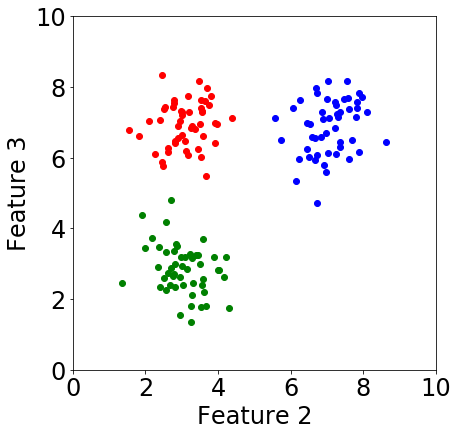

In [16]:
fig = plt.figure()

plt.legend()


ax = fig.add_subplot( 111 )
ax.set_ylim([0, 10])
ax.set_xlim([0, 10])
fig.set_size_inches(6.5, 6.5)

ax.scatter(cluster1[:,0], cluster1[:,1], c = "r")
ax.scatter(cluster2[:,0], cluster2[:,1], c = "g")
ax.scatter(cluster3[:,0], cluster3[:,1], c = "b")


##Adam's Data
ax.set_xlabel("Feature {}".format(2))
ax.set_ylabel("Feature {}".format(3))

##James' Data
#ax.set_xlabel("Feature {}".format(1))
#ax.set_ylabel("Feature {}".format(4))

plt.show()
        

### 3. ###
The centroids found by K-means can now be used as a simple nearest-neighbour classifier. Load your test data and select the two relevant features. Using a combination of the `cdist(X, metric='euclidean', p=2)` and `np.argmin` (with `axis` parameter) commands, construct a vector of labels for each of the test points indicating which cluster centroid is the nearest. Plot the test points in the previous plot with the colour indicating their class but a different symbol. The corresponding decision boundaries can be plotted by passing the centroids to the `Voronoi` and `voronoi_plot_2d` functions (remember to set the `ax` parameter of the later one to your current plot).

In [17]:
distance = cdist(test_data, centroids, metric = "Euclidean", p = 2)

test_labels = np.argmin(distance, 1)

test_cluster1_indexes = np.where(test_labels == 0)
test_cluster2_indexes = np.where(test_labels == 1)
test_cluster3_indexes = np.where(test_labels == 2)

test_cluster1 = test_data[test_cluster1_indexes, :][0]
test_cluster2 = test_data[test_cluster2_indexes, :][0]
test_cluster3 = test_data[test_cluster3_indexes, :][0]

/Users/adampluck/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


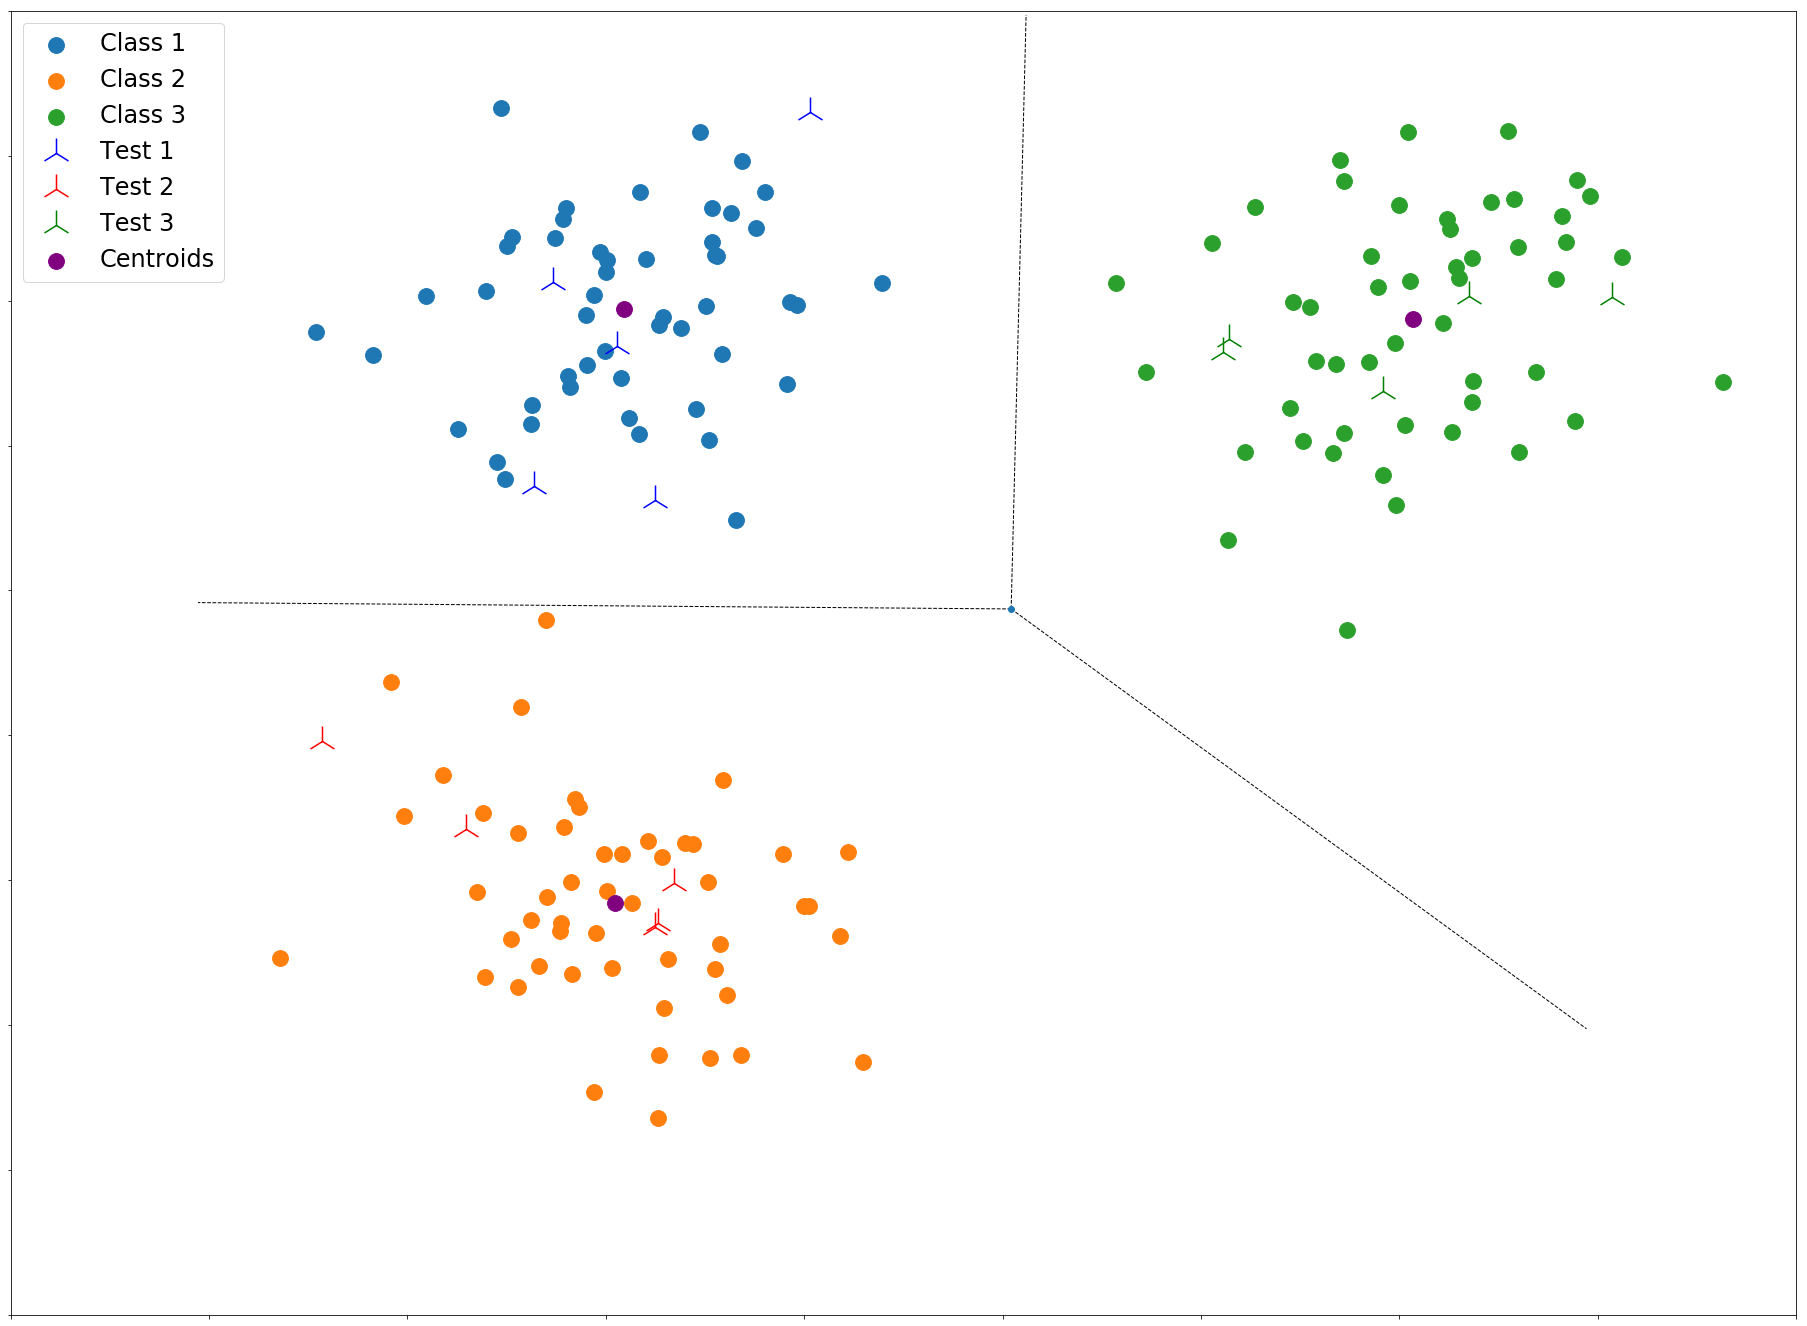

In [18]:
fig = plt.figure()


ax = fig.add_subplot( 111 )

#plotting the training data
ax.scatter(cluster1[:,0], cluster1[:,1], s = 250, label='Class 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s = 250, label='Class 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s = 250, label='Class 3')

#Plotting the test data
ax.scatter(test_cluster1[:,0], test_cluster1[:,1], c='b', marker='2', s = 900, label='Test 1')
ax.scatter(test_cluster2[:,0], test_cluster2[:,1], c='r', marker='2', s = 900, label='Test 2')
ax.scatter(test_cluster3[:,0], test_cluster3[:,1], c='g', marker='2', s = 900, label='Test 3')

#making the centroids more visable
ax.scatter(centroids[:, 0], centroids[:, 1], c = 'purple', s = 250, label='Centroids')

decision = Voronoi(centroids)
voronoi_plot_2d(decision, ax, show_points = False)

ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)


ax.set_xticklabels([])
ax.set_yticklabels([])
ax.legend(loc='upper left')

plt.show()

### 4. ###
Finally, we want you to deliberately find a non-optimal clustering. To this end, use the within-cluster sums of point-to-centroid distances returned by K-means to keep calling K-means until you find a clearly non-optimal value. You may need to change the definition of `kmeans` function and play around with its initialisation parameters. Plot the Voronoi diagram in the same plot to demonstrate non-optimality.

/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/adampluck/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


[]

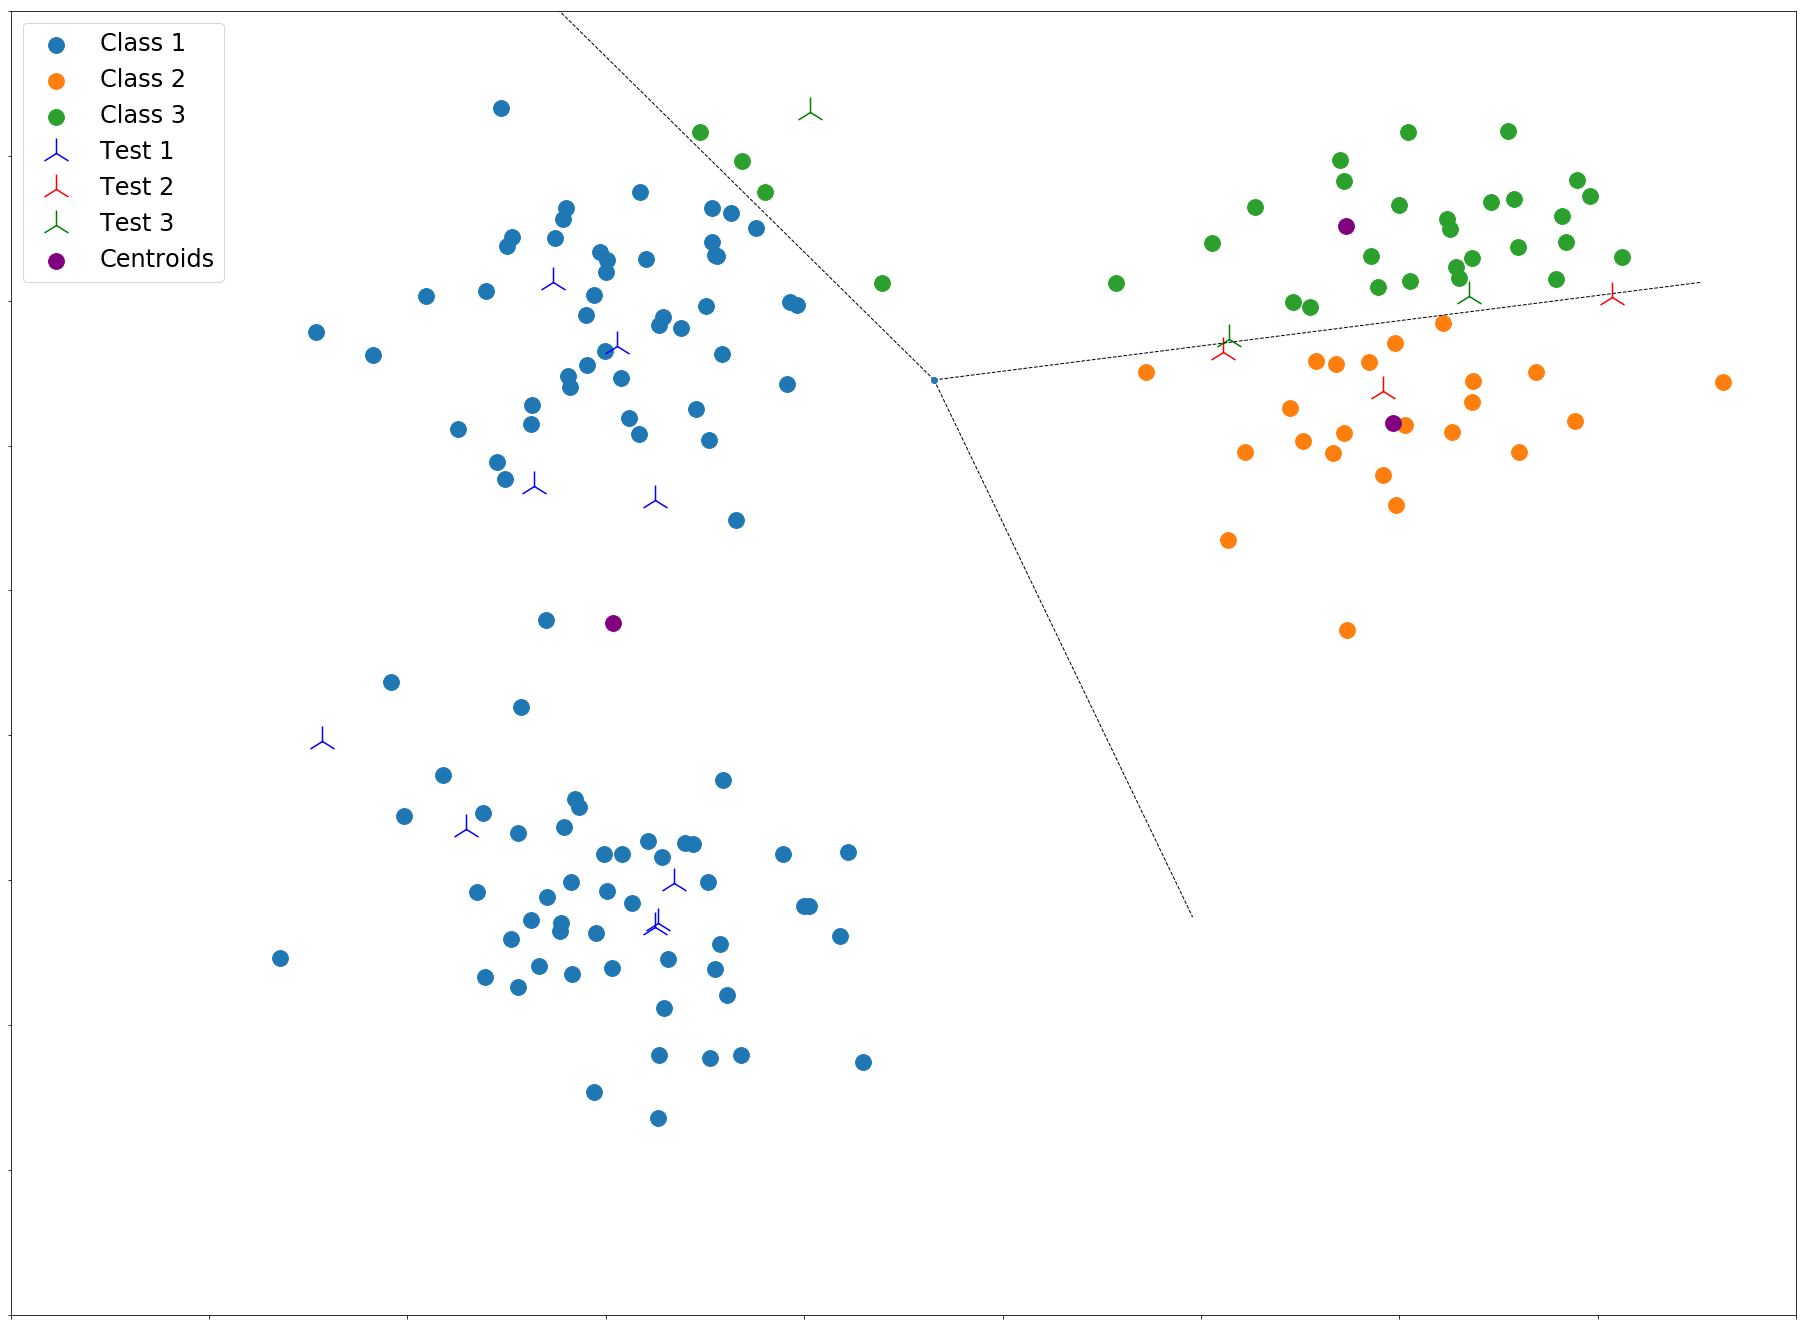

In [19]:
#Defining the new kmeans function
def newkmeans(Data, NClusters):
    for i in range(500):
        newkm = KMeans(NClusters, init = "random", n_init=1)
        fitted = newkm.fit(Data)
        
        if i == 0:
            maxFitted = fitted
##find the largest fitted.inertia
        if maxFitted.inertia_ < fitted.inertia_: 
            maxFitted = fitted
    return (maxFitted.cluster_centers_, maxFitted.labels_, maxFitted.inertia_)

#visualising the outcome of the k-means clustering
a = newkmeans(training_data, 3)

new_centroids = a[0]

#Getting the three clusters from training data

new_cluster1 = training_data[np.where(a[1]==0)]
new_cluster2 = training_data[np.where(a[1]==1)]
new_cluster3 = training_data[np.where(a[1]==2)]

new_distance = cdist(test_data, new_centroids, metric = "Euclidean", p = 2)

new_test_labels = np.argmin(new_distance, 1)

new_test_cluster1_indexes = np.where(new_test_labels == 0)
new_test_cluster2_indexes = np.where(new_test_labels == 1)
new_test_cluster3_indexes = np.where(new_test_labels == 2)

new_test_cluster1 = test_data[new_test_cluster1_indexes, :][0]
new_test_cluster2 = test_data[new_test_cluster2_indexes, :][0]
new_test_cluster3 = test_data[new_test_cluster3_indexes, :][0]

fig = plt.figure()
plt.legend()
ax = fig.add_subplot( 111 )

#plotting the training data
ax.scatter(new_cluster1[:,0], new_cluster1[:,1], s = 250, label='Class 1')
ax.scatter(new_cluster2[:,0], new_cluster2[:,1], s = 250, label='Class 2')
ax.scatter(new_cluster3[:,0], new_cluster3[:,1], s = 250, label='Class 3')

#Plotting the test data
ax.scatter(new_test_cluster1[:,0], new_test_cluster1[:,1], c='b', marker='2', s = 900, label='Test 1')
ax.scatter(new_test_cluster2[:,0], new_test_cluster2[:,1], c='r', marker='2', s = 900, label='Test 2')
ax.scatter(new_test_cluster3[:,0], new_test_cluster3[:,1], c='g', marker='2', s = 900, label='Test 3')

#making the centroids more visable
ax.scatter(new_centroids[:, 0], new_centroids[:, 1], c = 'purple', s = 250, label='Centroids')

decision = Voronoi(new_centroids)
voronoi_plot_2d(decision, ax, show_points = False)

ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)


ax.legend(loc='upper left')
ax.set_xticklabels([])
ax.set_yticklabels([])

/Users/adampluck/anaconda3/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:896: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  return_n_iter=True)
/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/adampluck/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


(0, 9)

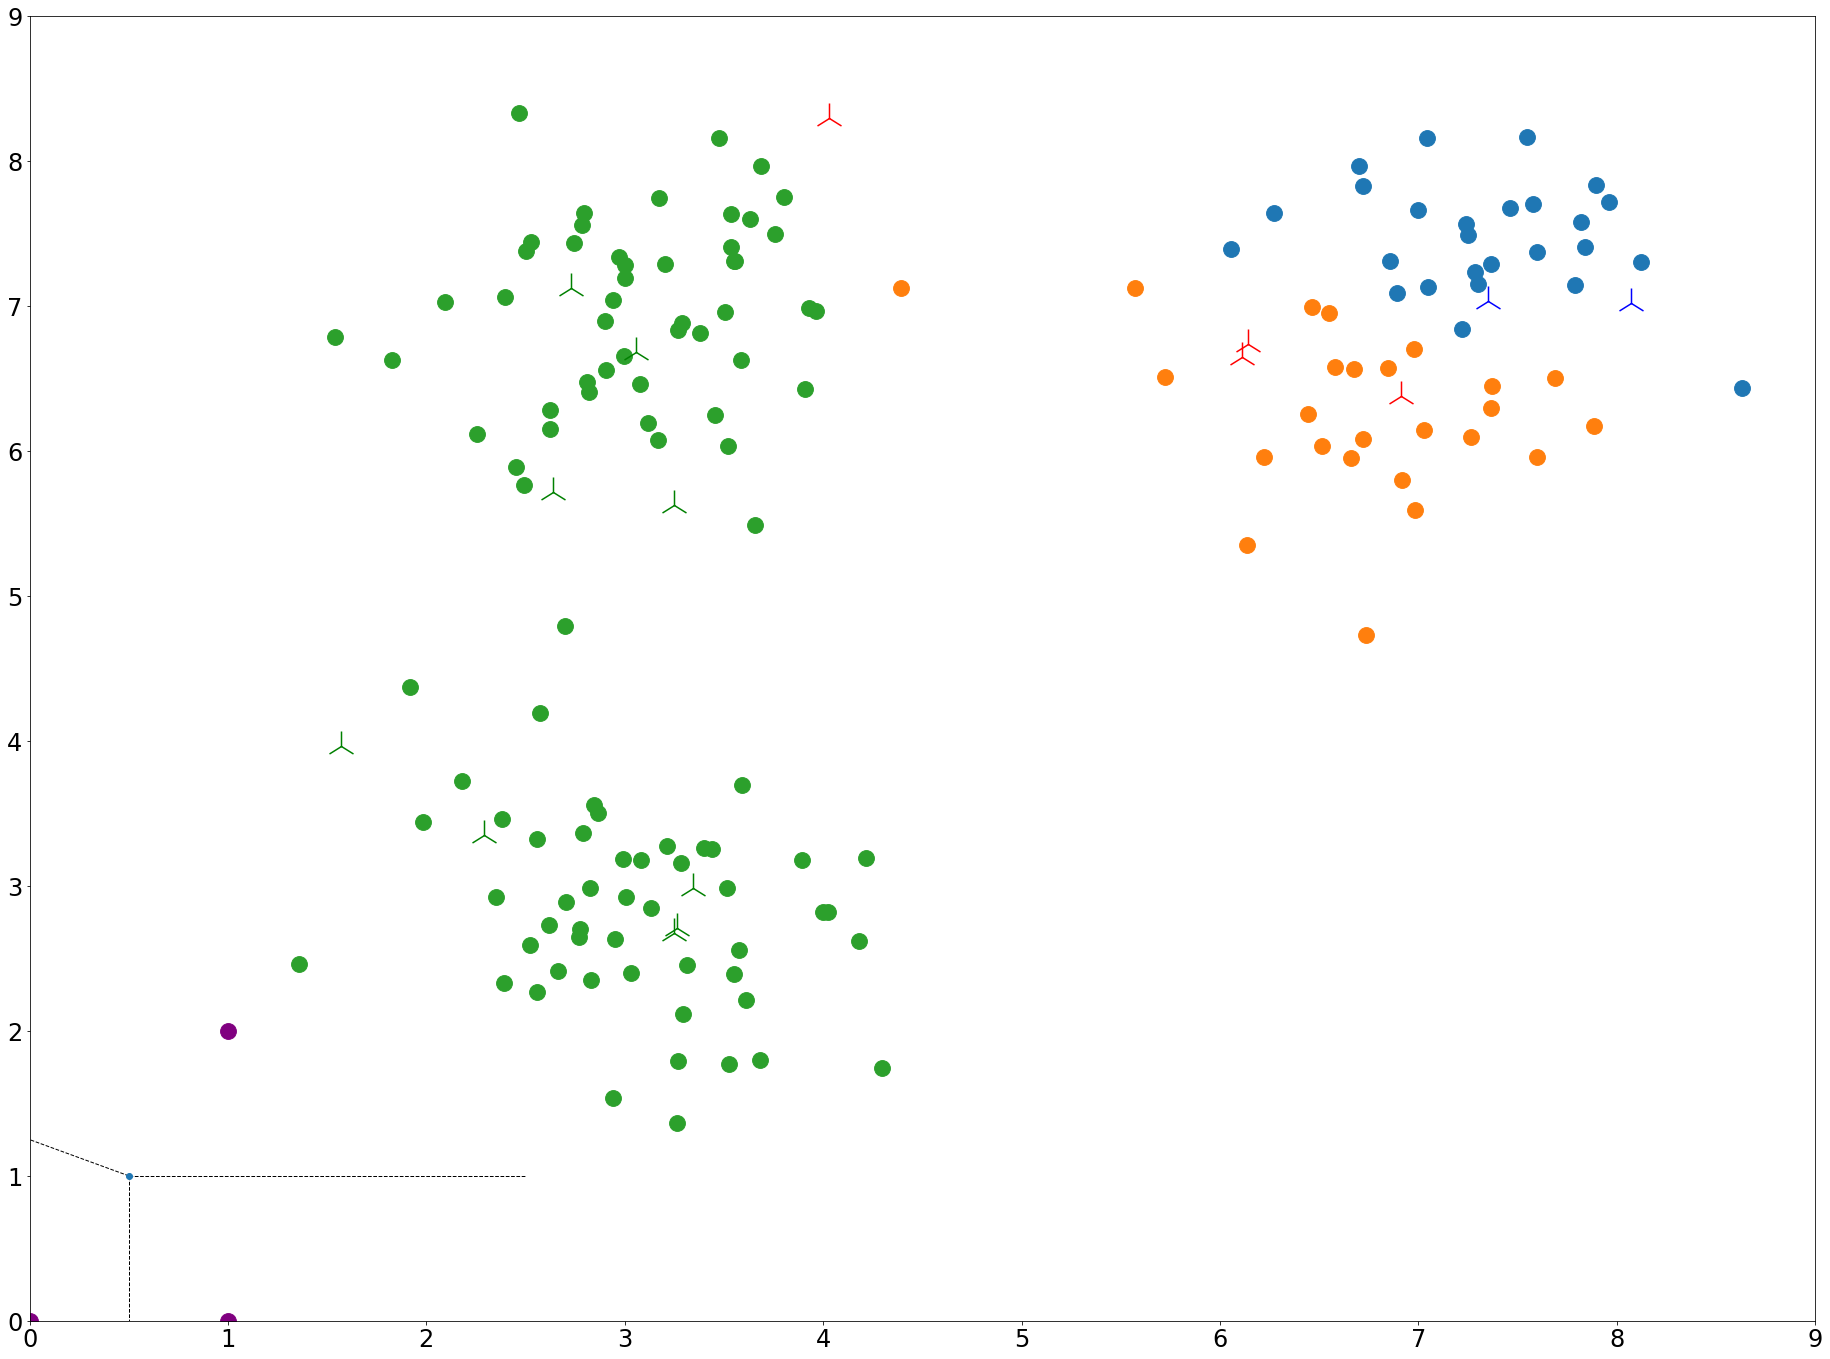

In [20]:
#######Choosing non-optimal initial centroids

def newkmeans(Data, NClusters, start):
  newkm = KMeans(NClusters, init = start)
  fitted = newkm.fit(Data)
  return (fitted.cluster_centers_, fitted.labels_, fitted.inertia_)


new_centroids = np.array([[0,0], [1,0], [1,2]])

#visualising the outcome of the k-means clustering
a = newkmeans(training_data, 3, new_centroids)

new_distance = cdist(test_data, a[0], metric = "Euclidean", p = 2)

new_test_labels = np.argmin(new_distance, 1)

# Getting the three training clusters
new_cluster1 = training_data[np.where(a[1]==0)]
new_cluster2 = training_data[np.where(a[1]==1)]
new_cluster3 = training_data[np.where(a[1]==2)]

new_test_cluster1_indexes = np.where(new_test_labels == 0)
new_test_cluster2_indexes = np.where(new_test_labels == 1)
new_test_cluster3_indexes = np.where(new_test_labels == 2)

new_test_cluster1 = test_data[new_test_cluster1_indexes, :][0]
new_test_cluster2 = test_data[new_test_cluster2_indexes, :][0]
new_test_cluster3 = test_data[new_test_cluster3_indexes, :][0]

##

fig = plt.figure()
plt.legend()
ax = fig.add_subplot( 111 )

#plotting the training data
ax.scatter(new_cluster1[:,0], new_cluster1[:,1], s = 250)
ax.scatter(new_cluster2[:,0], new_cluster2[:,1], s = 250)
ax.scatter(new_cluster3[:,0], new_cluster3[:,1], s = 250)

#Plotting the test data
ax.scatter(new_test_cluster1[:,0], new_test_cluster1[:,1], c='b', marker='2', s = 900)
ax.scatter(new_test_cluster2[:,0], new_test_cluster2[:,1], c='r', marker='2', s = 900)
ax.scatter(new_test_cluster3[:,0], new_test_cluster3[:,1], c='g', marker='2', s = 900)

#making the centroids more visable
ax.scatter(new_centroids[:, 0], new_centroids[:, 1], c = 'purple', s = 250)

#Plotting Voronoi
decision = Voronoi(new_centroids)
voronoi_plot_2d(decision, ax, show_points = False)

ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)




## CW1b (week 18) ##
The simple nearest-centroid classifier you constructed in the previous assignment leads to linear decision boundaries between each pair of classes, as visualised by the Voronoi diagram. We now want you to contrast and compare this with a maximum-likelihood classifier.

### 1. ###
Model the data in each class as being generated from a 2-D Normal Distribution. Estimate the class means and covariances from the labelled training data using the `np.mean` (remember about `axis` parameter) and `np.cov` functions. Visualise the estimated distributions by plotting contours of the `stats.multivariate_normal.pdf` functions of each class. Choose the contour level such that 95% of the probability mass is within the ellipse. Use as a starting point that for bivariate random distributions the points on this contour satisfy the equation
$$ (x-\mu)^{T} * \Sigma^{-1} * (x-\mu) / 2 = 3 $$
and use this to find the appropriate density for the contour level. `Python` functions to use include `plt.contour` and `np.meshgrid`.

**Clarification:** this basically tells you to draw an ellipse at squared Mahalanobis distance 6. Why 6 (actually 5.99)? This comes from the fact that sums of squared Gaussians follow a Chi-squared distribution, so we use the inverse of the Chi-squared cumulative distribution with 2 degrees of freedom. You can verify this in `Python` by the query `stats.chi2.ppf(0.95, 2)` which gives 5.9915. This is the 2-D equivalent of saying that in 1-D, 95% of the Gaussian probability mass is within +/- 2 standard deviations from the mean (actually 1.96). More information at the following links:  
* [http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/](http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/)
* [http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf](http://www.cs.ubc.ca/~murphyk/Teaching/CS340-Fall06/reading/gaussians.pdf)

/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


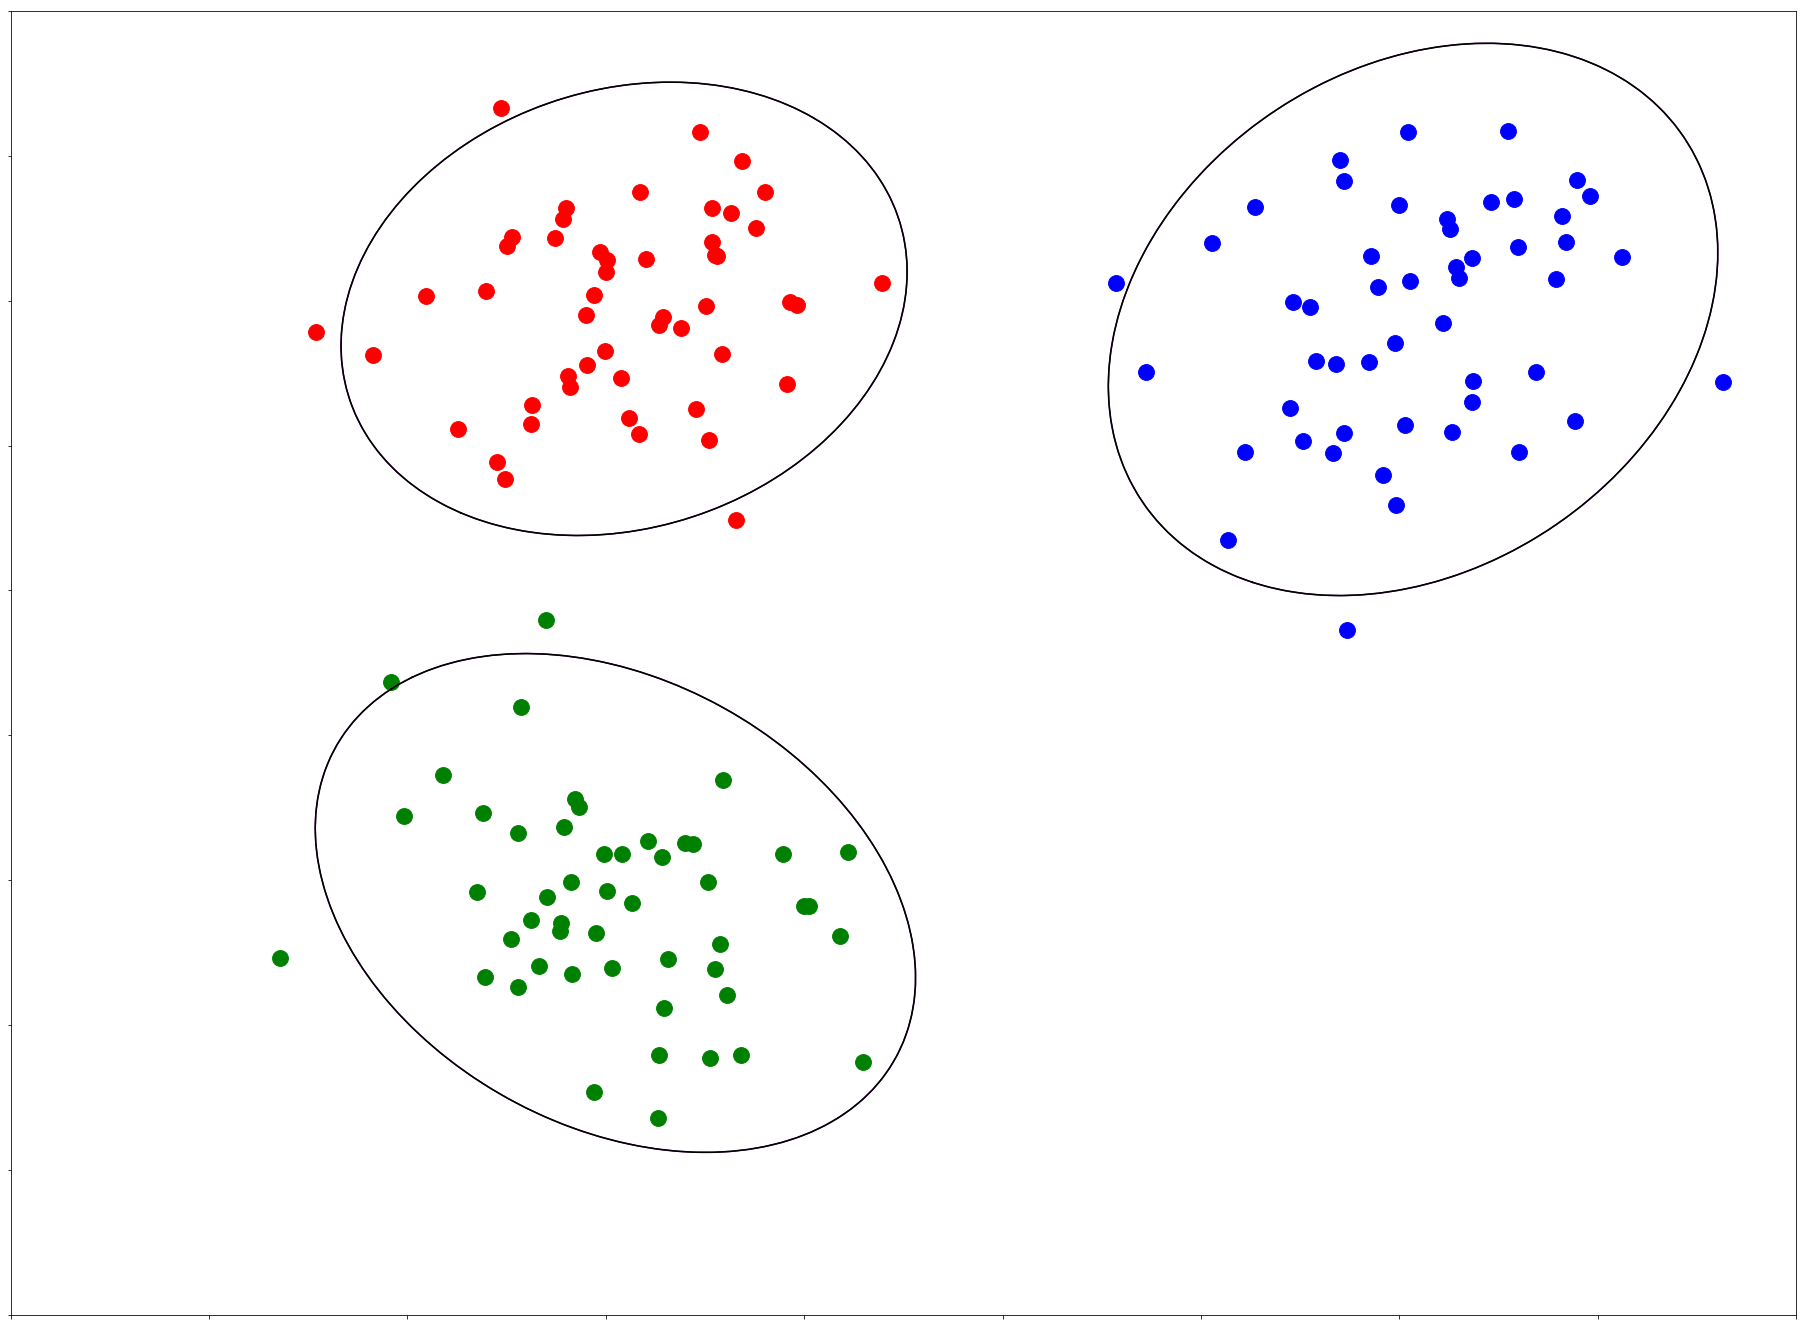

In [21]:
meanTrainOne = np.mean(cluster1, axis = 0)
meanTrainTwo = np.mean(cluster2, axis = 0)
meanTrainThree = np.mean(cluster3, axis = 0)

covTrainOne = np.cov(cluster1, rowvar = False)
covTrainTwo = np.cov(cluster2, rowvar = False)
covTrainThree = np.cov(cluster3, rowvar = False)

meshx = np.linspace(0, 9, 500)
meshy = np.linspace(0, 9, 500)

[x, y] = np.meshgrid(meshx, meshy)

# Need an (N, 2) array of (x, y) pairs.
xy = np.column_stack([x.flat, y.flat])

z1 = stats.multivariate_normal.pdf(xy, mean=meanTrainOne, cov=covTrainOne)
z1 = z1.reshape(x.shape)

z2 = stats.multivariate_normal.pdf(xy, mean=meanTrainTwo, cov=covTrainTwo)
z2 = z2.reshape(x.shape)

z3 = stats.multivariate_normal.pdf(xy, mean=meanTrainThree, cov=covTrainThree)
z3 = z3.reshape(x.shape)

P1 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(covTrainOne)))) * np.exp((-1/2.0)*stats.chi2.ppf(0.95, 2))
P2 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(covTrainTwo)))) * np.exp((-1/2.0)*stats.chi2.ppf(0.95, 2))
P3 = (1 / (2 * np.pi * np.sqrt(np.linalg.det(covTrainThree)))) * np.exp((-1/2.0)*stats.chi2.ppf(0.95, 2))

#####################

fig = plt.figure()

c1 = plt.contour(x,y,z1,[P1])
c2 = plt.contour(x,y,z2,[P2])
c3 = plt.contour(x,y,z3,[P3])


################


ax = fig.add_subplot( 111 )


ax.scatter(cluster1[:,0], cluster1[:,1], color = "red", s = 250)
ax.scatter(cluster2[:,0], cluster2[:,1], color = "green", s = 250)
ax.scatter(cluster3[:,0], cluster3[:,1], color = "blue", s = 250)



###################

meanArray = [meanTrainOne, meanTrainTwo, meanTrainThree]
covArray = [covTrainOne, covTrainTwo, covTrainThree]


for i in range(3):
    
    ##Calculating and assigning eigenvectors and values
    eValue = (np.linalg.eig((covArray)[i])[0])

    eVectors = (np.linalg.eig(covArray[i])[1])

    ##Finding largest eigenvector and eigenvalue
    largestValue = max(eValue)

    largestValueIndex = np.argmax(eValue)

    largestVector = eVectors[largestValueIndex]

    ##Finding smallest eigenvector and eigenvalue

    if largestValueIndex == 1:
        smallestVector = eVectors[0]
        smallestValue = eValue[0]
    else: 
        smallestVector = eVectors[1]
        smallestValue = eValue[1]

    ##Calulating the angle between x axis and largest eignvector

    angle = np.arctan(largestVector[1]/largestVector[0])


    ##Adjusting angle to make it non negative
    if angle < 0:
        angle = angle + 2*np.pi

    angle = np.pi - angle

    ##Getting the 95% confidence interval

    chi = np.sqrt(stats.chi2.ppf(0.95, 2))
    phi = angle
    
    
    theta = np.linspace(0, 2*np.pi, 100)


    ##Calculating the scaley thingy things

    a = chi*np.sqrt(largestValue)
    b = chi*np.sqrt(smallestValue)
    
    
    ellipseX = a*np.cos(theta)
    ellipseY = b*np.sin(theta)


    rotation = [[np.cos(phi), np.sin(phi)], [-np.sin(phi), np.cos(phi)]]
    
    ellipseR = np.matmul(np.transpose([ellipseX, ellipseY]), rotation)
    
    

    plt.plot(ellipseR[:,0] + (meanArray[i])[0], ellipseR[:,1] + (meanArray[i])[1], color = "black")

ax.set_xticklabels([])
ax.set_yticklabels([])
ax.legend(loc='upper left')

### 2. ###
Now plot the decision boundaries between each pair of classes. This can be done once again using the `plt.contour` function, this time on each of the three pairwise likelihood ratios. Visually inspect the decision boundaries and make sure you understand why they have a particular shape. Also check whether this maximum-likelihood classifier disagrees with the nearest-centroid classifier on any of the test or training points (for both your data sets if you're working in pairs).

/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/adampluck/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


[]

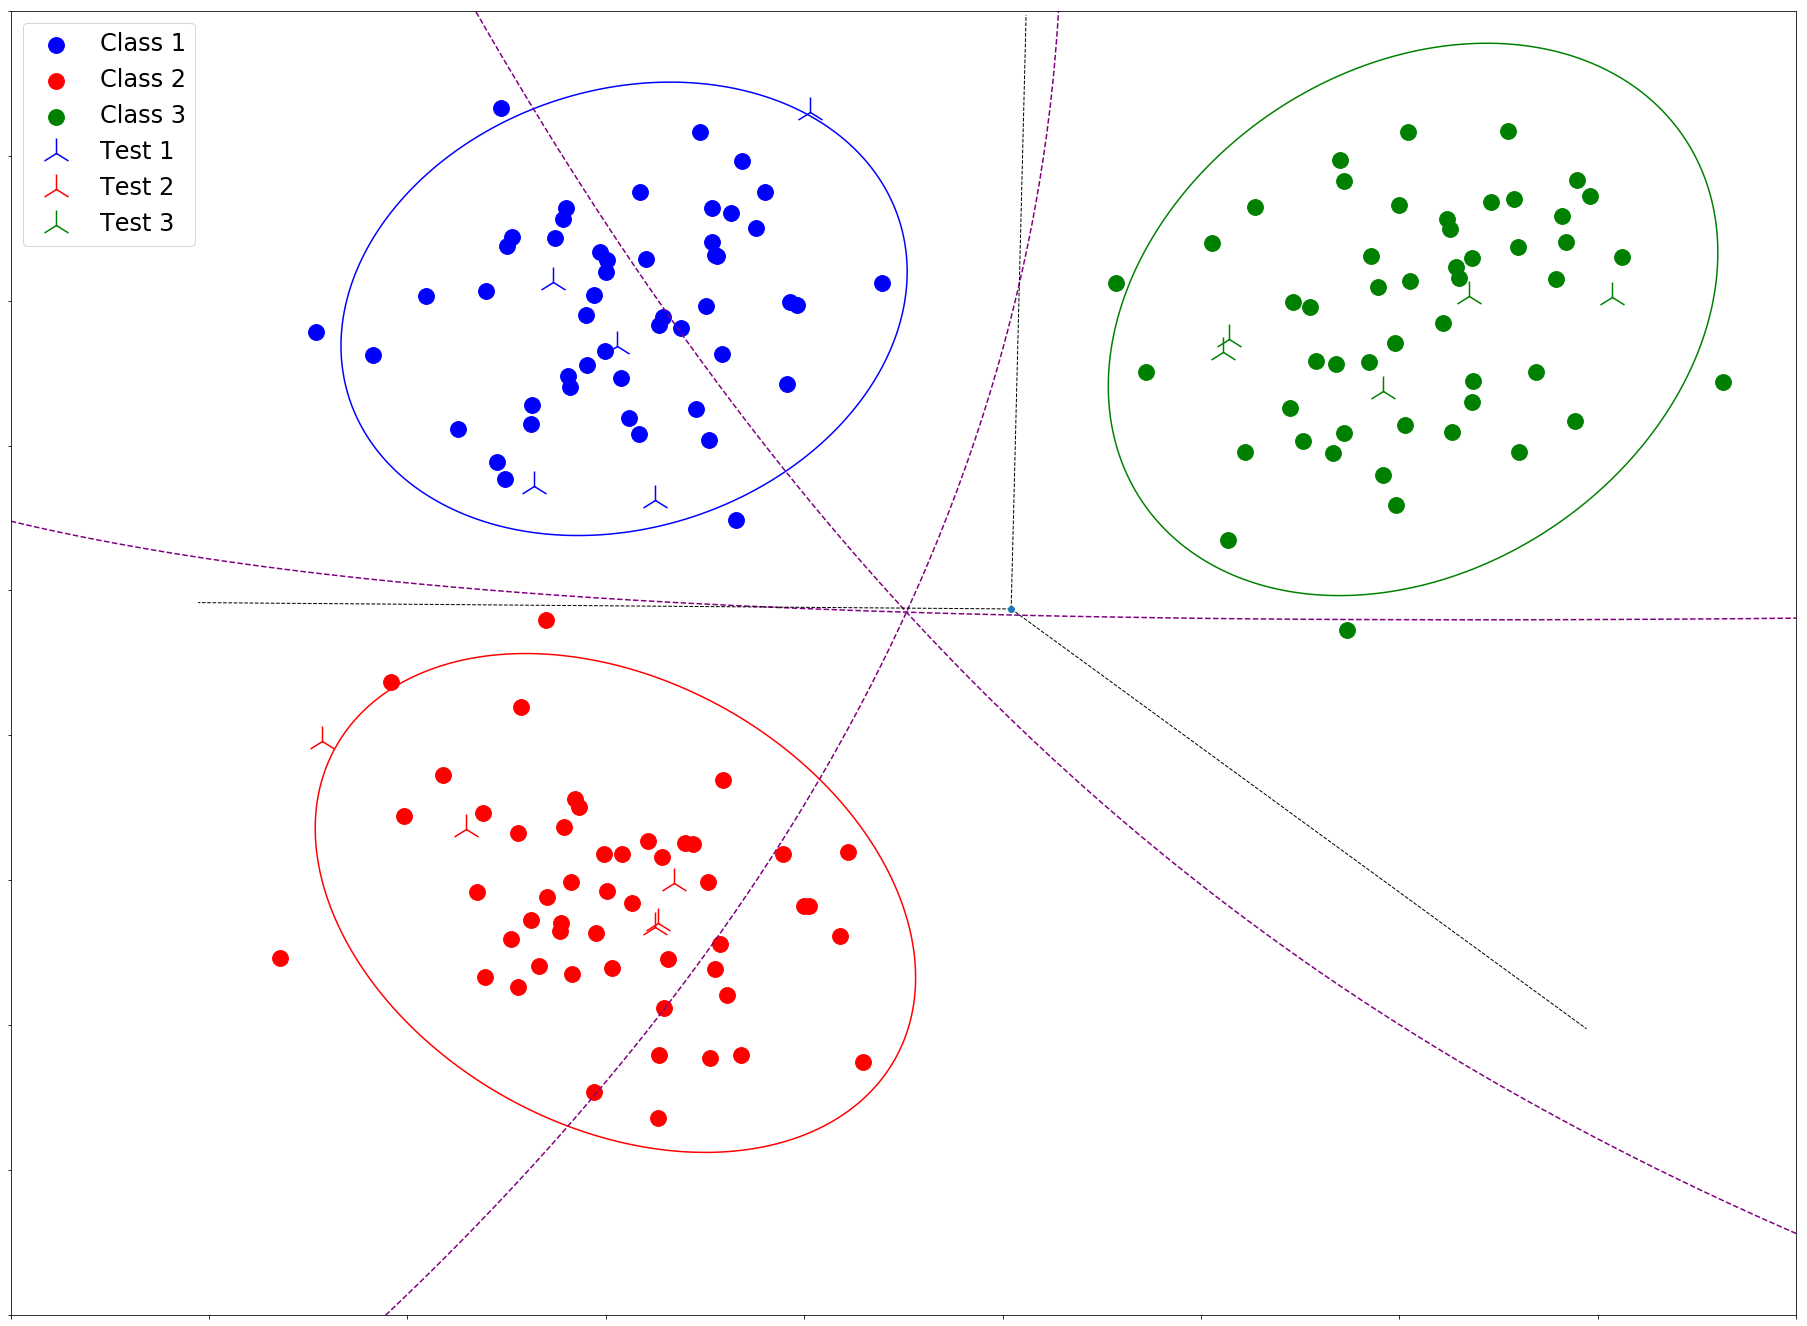

In [22]:
# put your code here
#####################

fig = plt.figure()

##plot normal contour

c1 = plt.contour(x,y,z1, [P1], colors = "blue")
c2 = plt.contour(x,y,z2,[P2], colors = "red")
c3 = plt.contour(x,y,z3, [P3], colors = "green")


##plot decision boundaries

d1 = plt.contour(x, y, (z1/z2), [1], linestyles='dashed', colors='purple')
d2 = plt.contour(x, y, (z1/z3), [1], linestyles='dashed', colors='purple')
d3 = plt.contour(x ,y ,(z2/z3), [1], linestyles='dashed', colors='purple')


################

ax = fig.add_subplot( 111 )


ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)


ax.scatter(cluster1[:,0], cluster1[:,1], color = "blue", s = 250,  label='Class 1')
ax.scatter(cluster2[:,0], cluster2[:,1], color = "red", s = 250,  label='Class 2')
ax.scatter(cluster3[:,0], cluster3[:,1], color = "green", s = 250,  label='Class 3')


#Plotting the test data
ax.scatter(test_cluster1[:,0], test_cluster1[:,1], c='b', marker='2', s = 900, label = "Test 1")
ax.scatter(test_cluster2[:,0], test_cluster2[:,1], c='r', marker='2', s = 900, label = "Test 2")
ax.scatter(test_cluster3[:,0], test_cluster3[:,1], c='g', marker='2', s = 900, label = "Test 3")

decision = Voronoi(centroids)
voronoi_plot_2d(decision, ax, show_points = False)

ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)
ax.legend(loc='upper left')



ax.set_xticklabels([])
ax.set_yticklabels([])





### 3. ###
How would you have to change the maximum-likelihood classifier so that its decision boundaries are the same as the ones for nearest-centroid? And how would you change it if you know that one of the three classes is twice as likely as the other two? Demonstrate the effect graphically.

/Users/adampluck/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/adampluck/anaconda3/lib/python3.6/site-packages/scipy/spatial/_plotutils.py:20: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  was_held = ax.ishold()


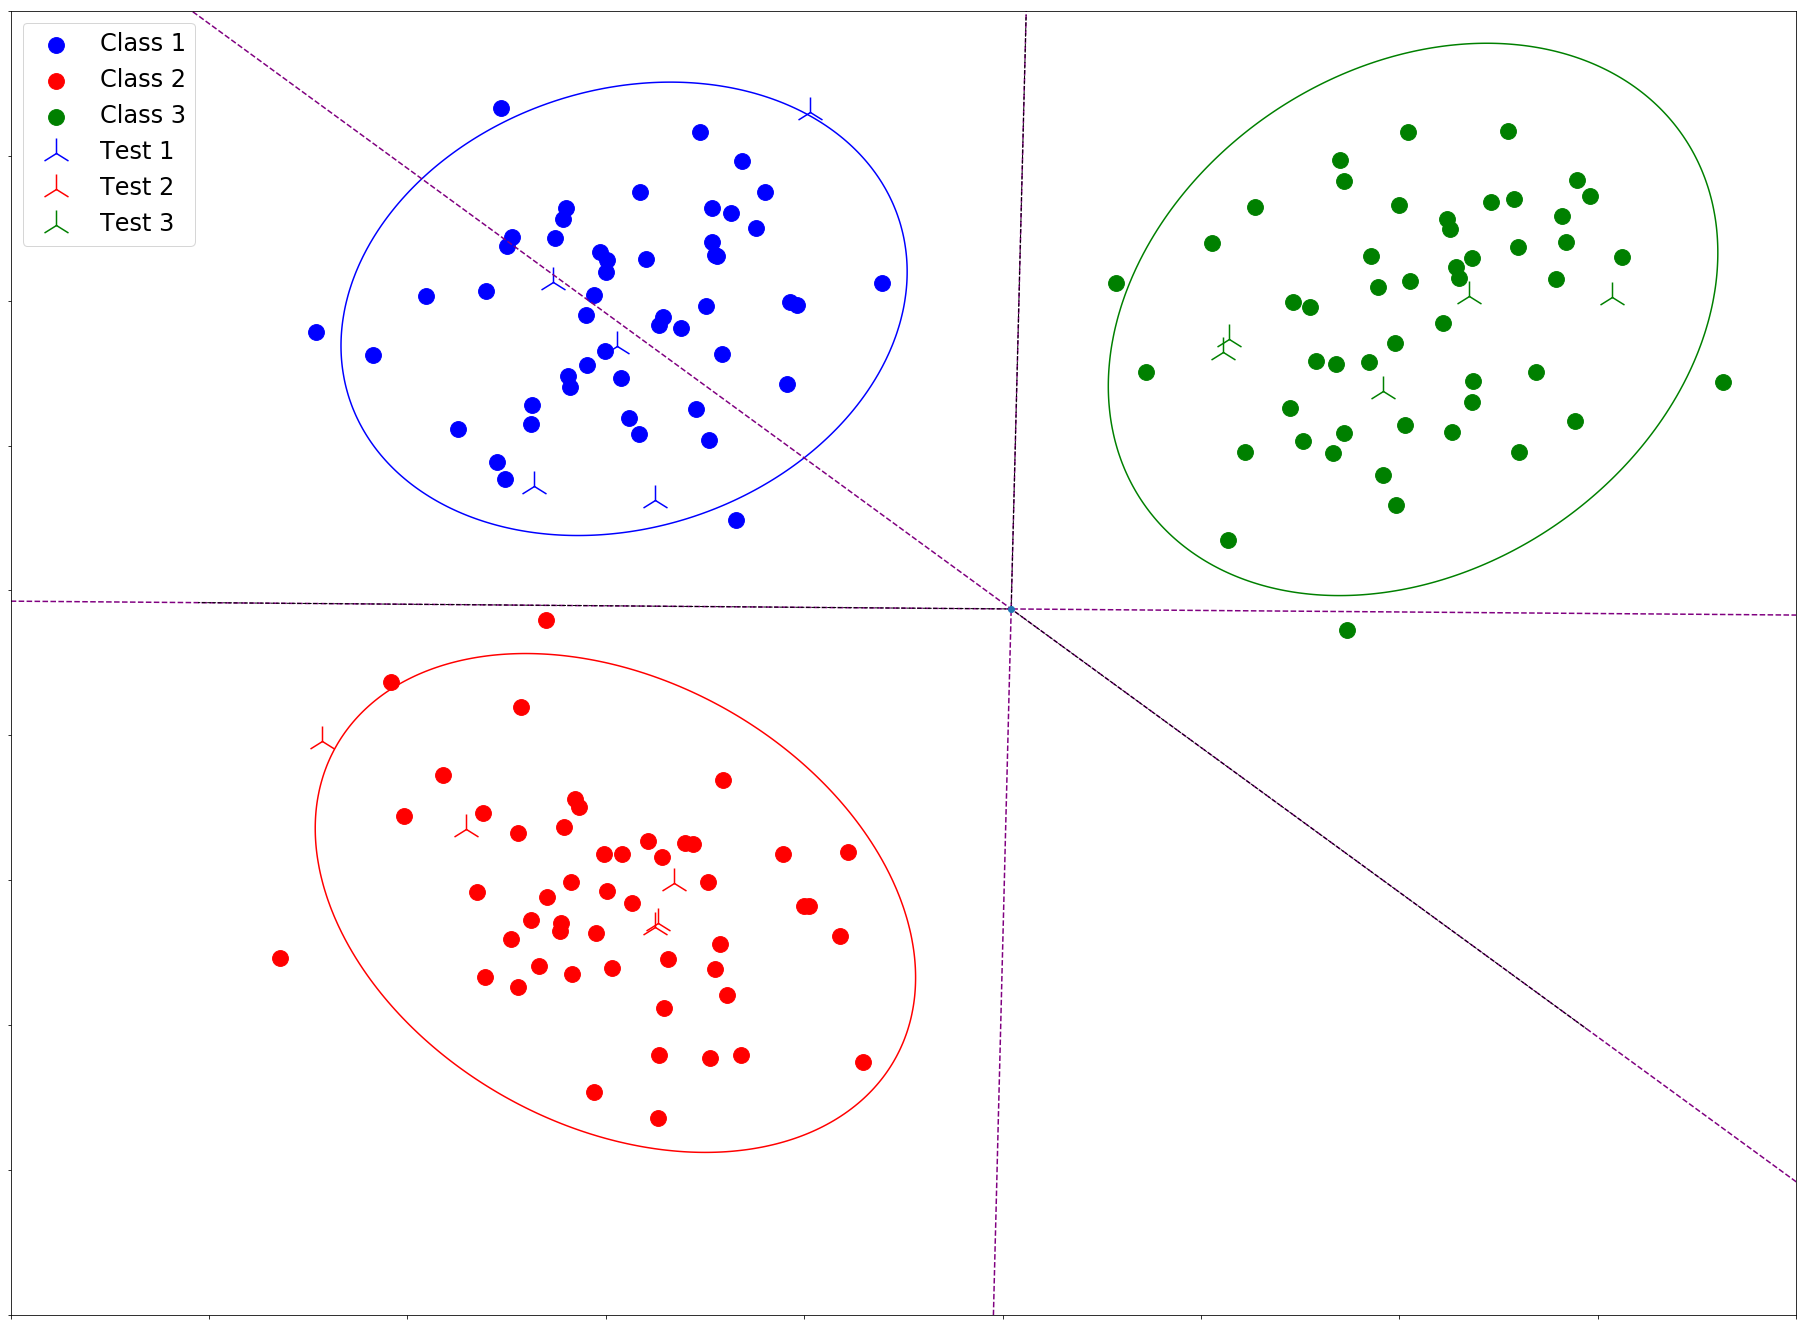

In [23]:
# put your code here
# put your code here
#####################

fig = plt.figure()

##plot normal contour

c1 = plt.contour(x,y,z1, [P1], colors = "blue")
c2 = plt.contour(x,y,z2,[P2], colors = "red")
c3 = plt.contour(x,y,z3, [P3], colors = "green")



##This takes the new probabilities having the same covariance for all three clusters (basic linear classifier)
nz1 = stats.multivariate_normal.pdf(xy, mean=meanTrainOne)
nz1 = nz1.reshape(x.shape)

nz2 = stats.multivariate_normal.pdf(xy, mean=meanTrainTwo)
nz2 = nz2.reshape(x.shape)

nz3 = stats.multivariate_normal.pdf(xy, mean=meanTrainThree)
nz3 = nz3.reshape(x.shape)


##plot decision boundaries
d1 = plt.contour(x, y, (nz1/nz2), [1], linestyles='dashed', colors='purple')
d2 = plt.contour(x, y, (nz1/nz3), [1], linestyles='dashed', colors='purple')
d3 = plt.contour(x, y, (nz2/nz3), [1], linestyles='dashed', colors='purple')


##Making one class twice as likely as the other two
#d1 = plt.contour(x, y, (2*nz1/nz2), [1], linestyles='dashed', colors='purple')
#d2 = plt.contour(x, y, (2*nz1/nz3), [1], linestyles='dashed', colors='purple')
#d3 = plt.contour(x, y, (nz2/nz3), [1], linestyles='dashed', colors='purple')



################

ax = fig.add_subplot( 111 )


ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)

ax.scatter(cluster1[:,0], cluster1[:,1], color = "blue", s = 250, label='Class 1')
ax.scatter(cluster2[:,0], cluster2[:,1], color = "red", s = 250, label='Class 2')
ax.scatter(cluster3[:,0], cluster3[:,1], color = "green", s = 250,label='Class 3')

#Plotting the test data
ax.scatter(test_cluster1[:,0], test_cluster1[:,1], c='b', marker='2', s = 900, label = "Test 1")
ax.scatter(test_cluster2[:,0], test_cluster2[:,1], c='r', marker='2', s = 900, label = "Test 2")
ax.scatter(test_cluster3[:,0], test_cluster3[:,1], c='g', marker='2', s = 900, label = "Test 3")



decision = Voronoi(centroids)
voronoi_plot_2d(decision, ax, show_points = False)

ax.set_ylim(ymin=0, ymax=9)
ax.set_xlim(xmin=0, xmax=9)


ax.legend(loc='upper left')
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()
